In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

sns.set_palette("flare")
target_names = ["No Diabetes","Prediabetes","Diabetes"]

In [25]:
files = os.listdir("data")
files = [file for file in files if '.csv' in file]
data = pd.read_csv(f"data/{files[0]}")

data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [26]:
columns = [col for col in data.columns]
columns.remove('Diabetes_012')
X = data[columns]
y = data['Diabetes_012']

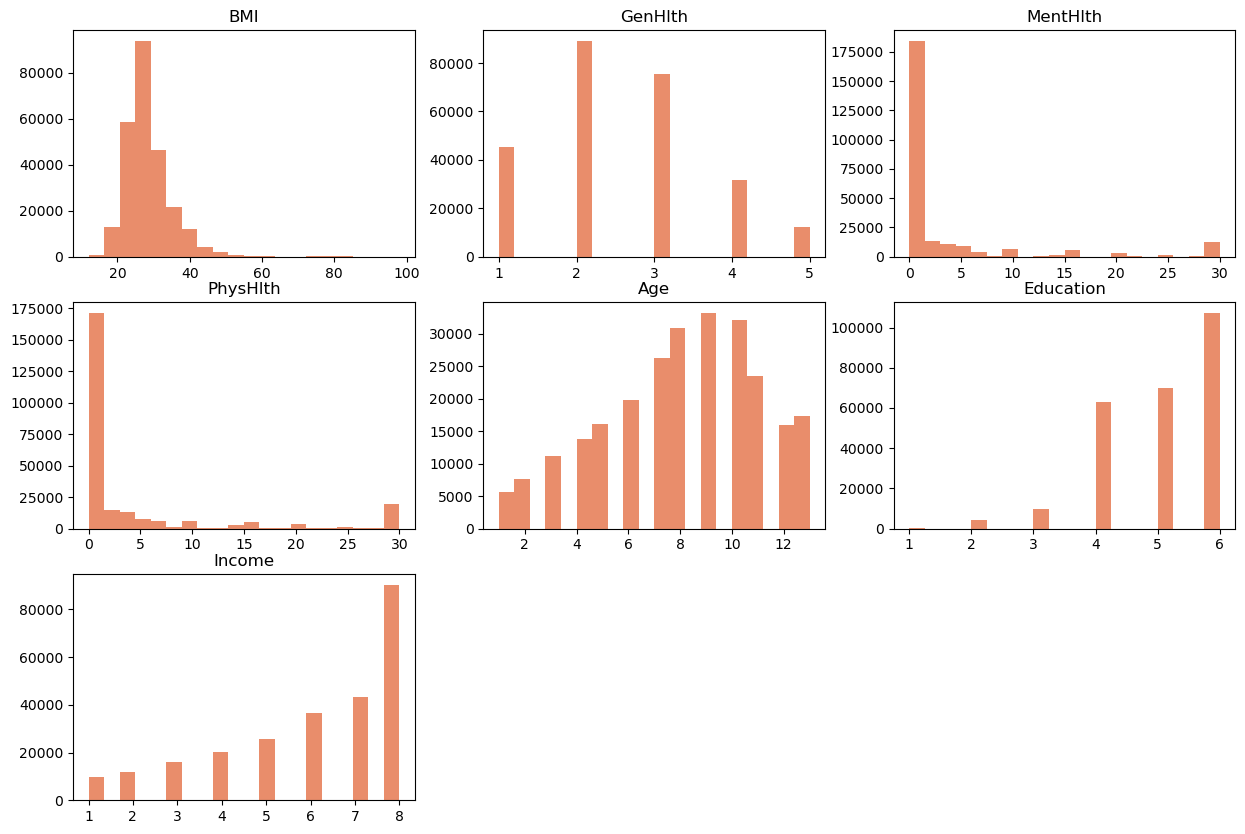

In [27]:
dist_cols = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']

plt.figure(figsize=(15,10))
for i, column in enumerate(dist_cols):
    plt.subplot(3,3,i+1)
    plt.hist(data[column], bins=20)
    plt.title(f"{column}")


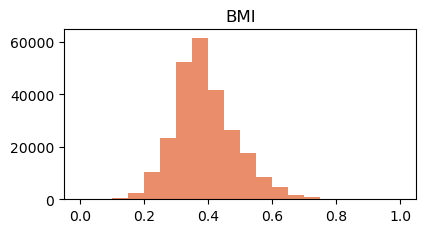

In [28]:
out_cols = ['BMI']

scaler = MinMaxScaler()

plt.figure(figsize=(10,7.5))
for i,col in enumerate(out_cols):
    plt.subplot(3,2,i+1)
    data[col] = scaler.fit_transform(np.log1p(data[col]).values.reshape(-1,1))
    plt.hist(data[col], bins=20)
    plt.title(f"{col}")


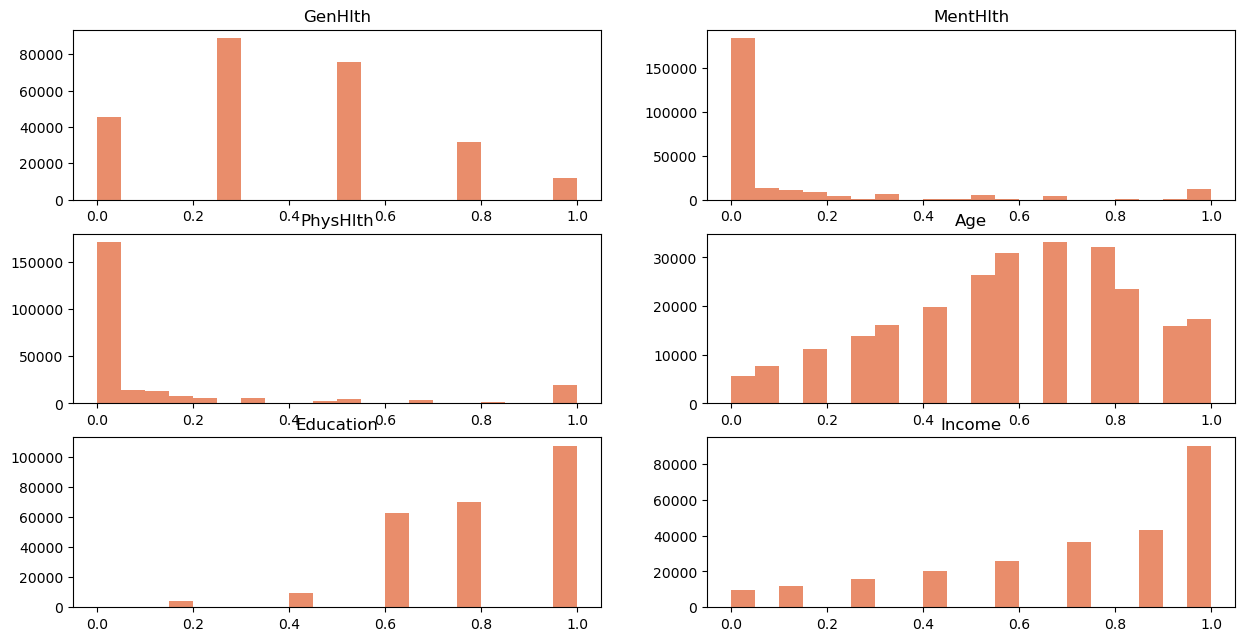

In [29]:
skew_cols = ['GenHlth','MentHlth','PhysHlth','Age','Education','Income']

plt.figure(figsize=(15,7.5))
for i,col in enumerate(skew_cols):
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
    plt.subplot(3,2,i+1)
    plt.hist(data[col] , bins=20)
    plt.title(f"{col}")

In [31]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

In [49]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=21))
model.add(BatchNormalization())
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/10
14025/14025 [==============================] - 31s 2ms/step - loss: -516.0731 - accuracy: 0.4268 - val_loss: -1568.1976 - val_accuracy: 0.4343
Epoch 2/10
14025/14025 [==============================] - 29s 2ms/step - loss: -3084.9392 - accuracy: 0.4220 - val_loss: -4912.1089 - val_accuracy: 0.4413
Epoch 3/10
14025/14025 [==============================] - 29s 2ms/step - loss: -7852.6411 - accuracy: 0.4225 - val_loss: -10812.6768 - val_accuracy: 0.4378
Epoch 4/10
14025/14025 [==============================] - 30s 2ms/step - loss: -14769.8213 - accuracy: 0.4219 - val_loss: -17420.0781 - val_accuracy: 0.4522
Epoch 5/10
14025/14025 [==============================] - 30s 2ms/step - loss: -23891.7656 - accuracy: 0.4207 - val_loss: -31325.6875 - val_accuracy: 0.4457
Epoch 6/10
14025/14025 [==============================] - 30s 2ms/step - loss: -35146.9375 - accuracy: 0.4224 - val_loss: -38222.3711 - val_accuracy: 0.4470
Epoch 7/10
14025/14025 [==============================] - 30s 2m

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

6011/6011 [==============================] - 6s 938us/step - loss: -114577.3984 - accuracy: 0.4371
Test Loss: -114577.3984, Test Accuracy: 0.4371


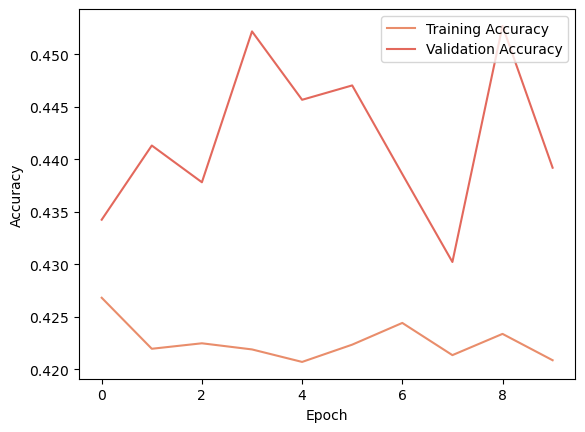

In [52]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
